---
# Predicción de Consumo Energético
---
**Autores:**  
- Costela Guijosa, Jose Luis  
- Sanchez Jimenez, Manuel  

**Fecha:**  
Enero de 2025

**Descripción:**  
Predicción de consumo energético.

**Contacto:**  
- joscosgui@alum.us.es  
- mansanjim1@alum.us.es

---
## Índice

1. Introducción

2. Análisis del dataset

3. Preprocesamiento y limpieza

4. Visualización

5. Transformación  
    + 5.1. Conversión de variables   
    + 5.2. Normalización  

6. Entrenamiento y evaluación del modelo (data mining)  
    + 6.1. División dataset entrenamiento-test  
    + 6.2. Ejecución de algoritmos de predicción  
        * 6.2.1. Regresión lineal  
        * 6.2.2. Árbol de decisión  
        * 6.2.3. Vecinos Más Cercanos (KNN)  
        * 6.2.4. XGBoost  
    + 6.3. Evaluación de modelos 
    + 6.4. Optimización de modelos  
    + 6.5. Modelos no optimizados vs optimizados  
    + 6.6. Feature Engineering
  
7. Clustering

8. Conclusiones

---
## 1. Introducción

Este proyecto tiene como objetivo desarrollar un modelo de predicción del consumo energético utilizando técnicas de Machine Learning, basándose en un conjunto de datos que contiene información sobre condiciones ambientales, características del edificio y patrones de uso de energía.

Siguiendo las fases del proceso KDD (Knowledge Discovery in Databases), realizamos una serie de pasos que incluyen preprocesamiento y limpieza de datos, visualización, transformación de variables y modelado predictivo. En esta última fase, se aplican diversos algoritmos de aprendizaje supervisado, como Regresión Lineal, Árboles de Decisión y K-Neighbors Regressor (KNN), con el fin de encontrar el modelo que mejor prediga el consumo energético.

A través de este estudio, buscamos analizar las variables más influyentes en el consumo energético y evaluar la efectividad de distintos modelos para ofrecer una solución eficiente y precisa en la predicción del uso de energía.

---
## 2. Análisis del dataset
El conjunto de datos utilizado en este proyecto consta de 5000 registros y ha sido diseñado para el análisis y la predicción del consumo energético en función de diversas variables. Incluye información relacionada con la temporalidad, las condiciones ambientales, las características del edificio, el uso de sistemas eléctricos y la contribución de energía renovable. La variable objetivo, EnergyConsumption, representa el consumo total de energía consumido en una hora por cada una de las instancias.

Según la información proporcionada por el distribuidor del dataset, este combina datos reales (1000 instancias) con datos sintéticos generados artificialmente (4000 instancias). La generación de datos sintéticos se ha llevado a cabo preservando las propiedades estadísticas del conjunto original, con el objetivo de mejorar la robustez y precisión de los modelos de predicción desarrollados en este estudio.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, f_regression

df = pd.read_csv('Data/Energy_consumption_dataset.csv')

Se realiza un análisis preliminar del dataframe para identificar los tipos de variables presentes en sus atributos

In [2]:
print("Información del dataframe:")
print(df.info(), "\n")

print("Primeras instancias del dataframe:")
print(df.head(), "\n")

print("Descripcion del dataframe:")
print(df.describe())

Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB
None 

Primeras instancias del dataframe:
   Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
0      1     

---
## 3. Preprocesamiento y limpieza

En esta fase se realiza la limpieza y preparación de los datos, eliminando valores nulos, transformando variables categóricas y asegurando la calidad del dataset. Este proceso es fundamental para garantizar que los modelos predictivos trabajen con datos consistentes y estructurados.

Se realiza una pequeña consulta por si existe algún dato faltante

In [3]:
print("Se revisa si existe algún dato faltante")
print(df.isnull().sum()) # Se comprueba que no existe ningún dato faltante
print("Observando las metricas anteriores se observa que no hay datos faltantes")

Se revisa si existe algún dato faltante
Month                0
Hour                 0
DayOfWeek            0
Holiday              0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
EnergyConsumption    0
dtype: int64
Observando las metricas anteriores se observa que no hay datos faltantes


---

## 4.Visualización

Pequeño parrafo de una o dos lineas explicando que es este apartado


### Histograma de energia consumida.
A través de este histograma se observa como los datos de consumo eléctrico siguen una distribución similar
a una distribución normal centrada en un rango de 75 a 80 unidades.

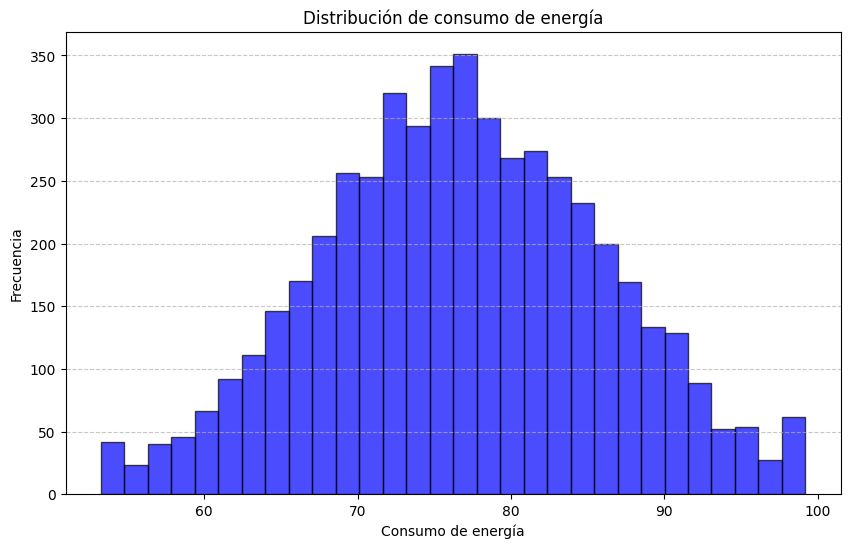

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(df['EnergyConsumption'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribución de consumo de energía')
plt.xlabel('Consumo de energía')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

### Consumo horario en vacaciones y no-vacaciones 

En días festivos, el consumo energético presenta un comportamiento más irregular, con picos durante la noche y una estructura diaria menos definida, lo que refleja horarios más flexibles. Por otro lado, en los días no festivos, se observan patrones más estructurados, con aumentos en horas laborales y de la tarde, mostrando rutinas más marcadas.

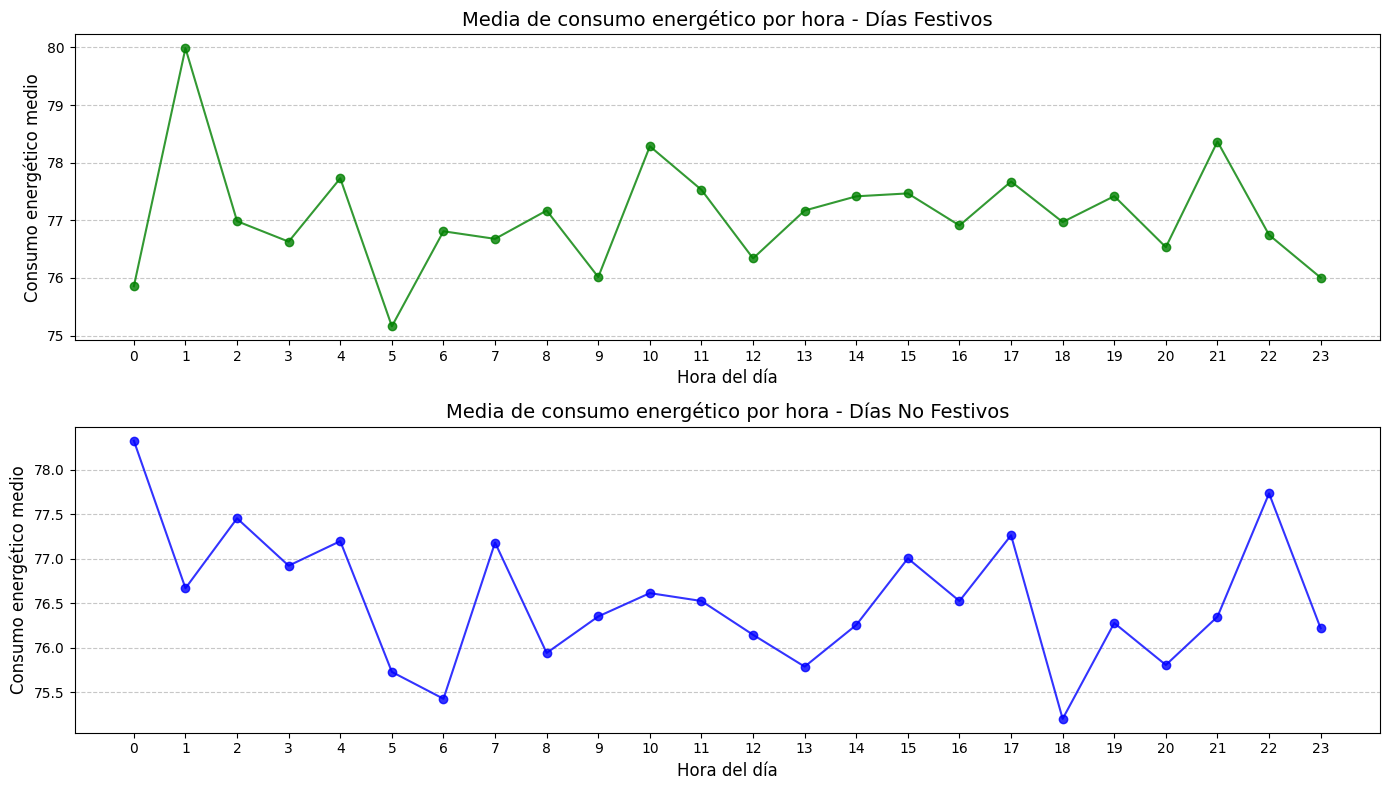

In [5]:
df_holiday = df[df['Holiday'] == 'Yes']
df_non_holiday = df[df['Holiday'] == 'No']

df_hourly_energy_holiday = df_holiday.groupby('Hour')['EnergyConsumption'].mean()
df_hourly_energy_non_holiday = df_non_holiday.groupby('Hour')['EnergyConsumption'].mean()

# Días festivos
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(df_hourly_energy_holiday.index, df_hourly_energy_holiday.values, marker='o', linestyle='-', color='green', alpha=0.8)
plt.title('Media de consumo energético por hora - Días Festivos', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Consumo energético medio', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Días no festivos
plt.subplot(2, 1, 2)
plt.plot(df_hourly_energy_non_holiday.index, df_hourly_energy_non_holiday.values, marker='o', linestyle='-', color='blue', alpha=0.8)
plt.title('Media de consumo energético por hora - Días No Festivos', fontsize=14)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Consumo energético medio', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

### Consumo en los distintos dias de la semana

Durante los dias de la semana el consumo energético es regular.

DayOfWeek
Friday       77.103561
Monday       76.171877
Saturday     77.325581
Sunday       76.578337
Thursday     76.454205
Tuesday      77.210683
Wednesday    76.684472
Name: EnergyConsumption, dtype: float64
DayOfWeek
Monday       76.171877
Tuesday      77.210683
Wednesday    76.684472
Thursday     76.454205
Friday       77.103561
Saturday     77.325581
Sunday       76.578337
Name: EnergyConsumption, dtype: float64


/var/folders/3f/kkqj_rh14mj7009wp06l78r40000gn/T/ipykernel_41400/1449759358.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_consumption_by_day.index, y=mean_consumption_by_day.values, palette='viridis')


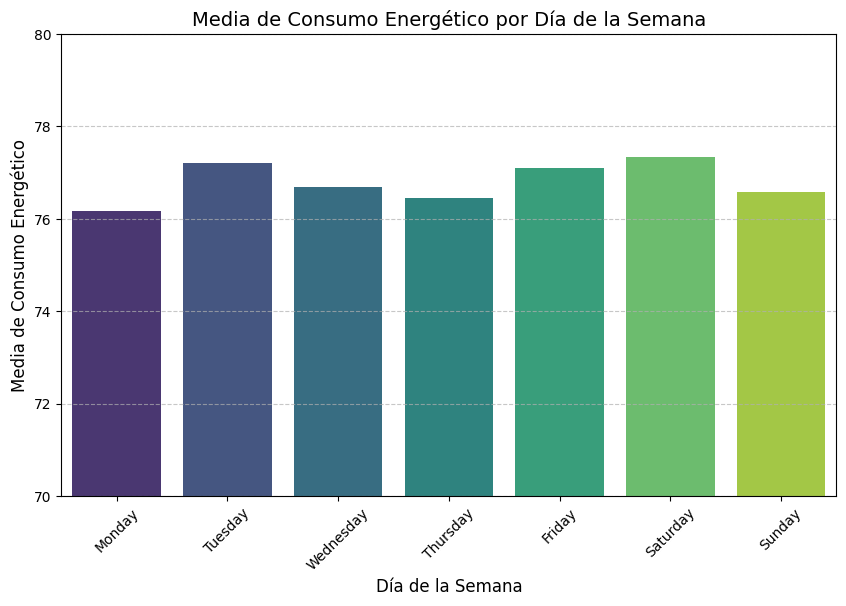

In [6]:
mean_consumption_by_day = df.groupby('DayOfWeek')['EnergyConsumption'].mean()
print(mean_consumption_by_day)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_consumption_by_day = mean_consumption_by_day.reindex(ordered_days)
print(mean_consumption_by_day)

plt.figure(figsize=(10, 6))
plt.ylim(70, 80)
sns.barplot(x=mean_consumption_by_day.index, y=mean_consumption_by_day.values, palette='viridis')
plt.title('Media de Consumo Energético por Día de la Semana', fontsize=14)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Media de Consumo Energético', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


### Consumo en las distintas estaciones del año

In [7]:
def get_season(month):
    if month in [12, 1, 2]:  # Invierno
        return 'Invierno'
    elif month in [3, 4, 5]:  # Primavera
        return 'Primavera'
    elif month in [6, 7, 8]:  # Verano
        return 'Verano'
    elif month in [9, 10, 11]:  # Otoño
        return 'Otoño'

/var/folders/3f/kkqj_rh14mj7009wp06l78r40000gn/T/ipykernel_41400/1507089352.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_consumption_by_season.index, y=mean_consumption_by_season.values, palette='coolwarm')


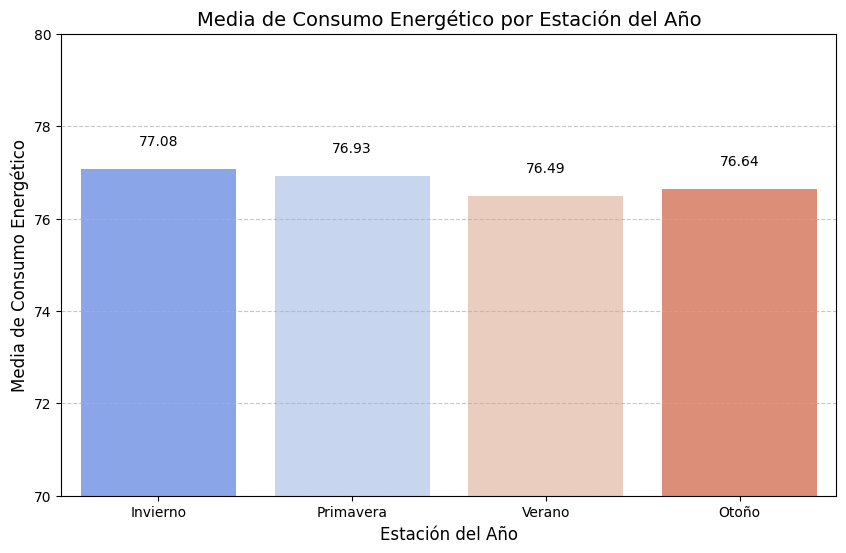

In [8]:
df['season'] = df['Month'].apply(get_season)

mean_consumption_by_season = df.groupby('season')['EnergyConsumption'].mean()

ordered_seasons = ['Invierno', 'Primavera', 'Verano', 'Otoño']
mean_consumption_by_season = mean_consumption_by_season.reindex(ordered_seasons)

plt.figure(figsize=(10, 6))
plt.ylim(70, 80)
sns.barplot(x=mean_consumption_by_season.index, y=mean_consumption_by_season.values, palette='coolwarm')
plt.title('Media de Consumo Energético por Estación del Año', fontsize=14)
plt.xlabel('Estación del Año', fontsize=12)
plt.ylabel('Media de Consumo Energético', fontsize=12)

for index, value in enumerate(mean_consumption_by_season.values):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

df = df.drop(columns=['season'])

---
## 5. Transformación

Antes de pasarle el dataset a los distintos modelos de regresión son necesarias realizar diversas transformaciones, tales como la conversión de las variables categóricas o la normalización de aquellas columnas numéricas.   

### 5.1. Conversión de variables

Primero de todo, la variable categórica DayOfWewk se ha convertido en variable numérica. Para ello, se ha realizado de forma manual, de manera que el modelo permita interpretar mejor el orden secuencial de los días de la semana. Por otro lado, con la función get_dummies se convierte cada categoría en una nueva columna binaria.

In [9]:
df['DayOfWeek'] = df['DayOfWeek'].map({
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
})

df = pd.get_dummies(df, columns=['Holiday', 'HVACUsage', 'LightingUsage'], drop_first=True)

print("Información del dataframe con la conversion de los datos realizados:")
print(df.info(), "\n")
print(df.head())

Información del dataframe con la conversion de los datos realizados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   int64  
 3   Temperature        5000 non-null   float64
 4   Humidity           5000 non-null   float64
 5   SquareFootage      5000 non-null   float64
 6   Occupancy          5000 non-null   int64  
 7   RenewableEnergy    5000 non-null   float64
 8   EnergyConsumption  5000 non-null   float64
 9   Holiday_Yes        5000 non-null   bool   
 10  HVACUsage_On       5000 non-null   bool   
 11  LightingUsage_On   5000 non-null   bool   
dtypes: bool(3), float64(5), int64(4)
memory usage: 366.3 KB
None 

   Month  Hour  DayOfWeek  Temperature   Humidity  SquareFootage  Occupancy  \
0    

### 5.2. Normalizacion

En la etapa de normalización, diversas columnas numéricas tales como la temperatura o la humedad se transformas sus valores para que tengan media 0 y desviación estándar 1, mejorando la capacidad del modelo para interpretar los datos sin verse afectado por diferentes escalas de magnitud.

In [10]:
colums_to_scaler = ['Temperature','Humidity','SquareFootage','RenewableEnergy']

scaler = StandardScaler()
df[colums_to_scaler] = scaler.fit_transform(df[colums_to_scaler])

---

## 6. Entrenamiento y evaluación del modelo (data mining)

Para la evaluación y entrenamiento del dataset, se ha dividido el conjunto de datos en dos subconjuntos: conjunto de entrenamiento y conjunto de prueba.  Posteriormente, se ha utilizado diversos modelos para la predicción, los cuales fueron optimizados con posterioridad con GridSearchCV, una técnica de búsqueda de hiperparámetros que explora diferentes combinaciones de parámetros. Para evaluar el rendimiento del modelo, se han utilizado métricas como el Error Cuadrático Medio (MSE), que mide la diferencia promedio cuadrada entre los valores reales y predichos, y el Coeficiente de Determinación (R²), que indica qué tan bien se ajusta el modelo a los datos.
Por último, se han obtenido las variables más representativas y se han vuelto a ejecutar los modelos optimizados para comprobar si existe una diferencia significativa entre usar  el dataset completo o no.

### 6.1. División dataset entrenamiento - test

Se ha dividido el conjunto de datos en dos subconjuntos: conjunto de entrenamiento y conjunto de prueba, utilizando la función train_test_split() de sklearn.

In [11]:
# Dividir el dataset <X, y> en dos datasets <X_train, y_train> y <X_test, y_test> con una distribución 80%-20%,
# entrenar el clasificador con <X_train, y_train> y calcular la métrica accuracy con <X_test, y_test>

X=df.drop(columns=['EnergyConsumption'])
Y=df['EnergyConsumption']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

### 6.2. Ejecución de algoritmos de predicción

No se si poner aqui algo o no

#### 6.2.1. Regresión lineal



In [12]:
# Crear el modelo de Regresión Lineal
model_lr = LinearRegression()

# Entrenar el modelo
model_lr.fit(X_train, y_train)

# Hacer predicciones
y_pred_lr = model_lr.predict(X_test)

# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal - MSE:", mse_lr)
print("Regresión Lineal - R²:", r2_lr)

Regresión Lineal - MSE: 58.21965712118162
Regresión Lineal - R²: 0.33271002044784725


#### 6.2.2. Árbol de decisión

In [13]:
# Crear el modelo de Árbol de Decisión
model_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

# Entrenar el modelo
model_tree.fit(X_train, y_train)

# Hacer predicciones
y_pred_tree = model_tree.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Árbol de Decisión - MSE:", mse_tree)
print("Árbol de Decisión - R²:", r2_tree)


Árbol de Decisión - MSE: 62.61385781672854
Árbol de Decisión - R²: 0.2823454831546045


#### 6.2.3. Vecinos más cercanos (KNN)

In [14]:
# Optimización de hiperparámetros para KNN
param_grid_knn = {'n_neighbors': [3, 5, 10, 15, 20], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

print("Mejores hiperparámetros para KNN:", grid_search_knn.best_params_)

# Crear modelo KNN con los mejores hiperparámetros obtenidos a través del GridSearchCV
best_params = grid_search_knn.best_params_
model_knn = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], p=best_params['p'], weights=best_params['weights'])

model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN - MSE:", mse_knn)
print("KNN - R²:", r2_knn)

Mejores hiperparámetros para KNN: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
KNN - MSE: 69.24514036614777
KNN - R²: 0.20634042548832365


#### 6.2.4. XGBoost

In [15]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost - MSE:", mse_xgb)
print("XGBoost - R²:", r2_xgb)

XGBoost - MSE: 58.37266808292848
XGBoost - R²: 0.33095627117167425


### 6.3. Evaluación de modelos

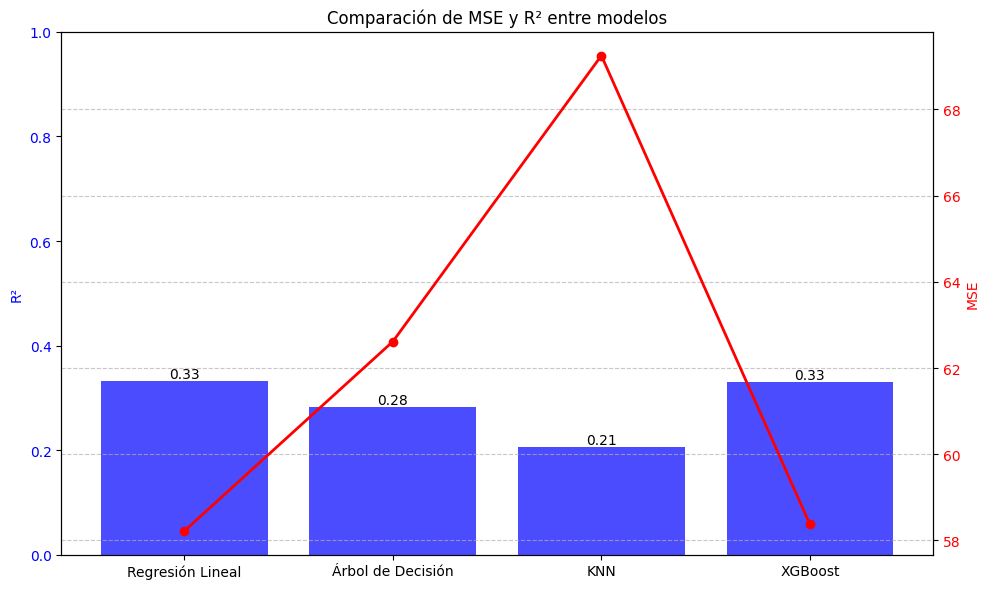

In [16]:
# Crear gráfico comparativo de MSE y R²
models = ['Regresión Lineal', 'Árbol de Decisión', 'KNN', 'XGBoost']
mse_values = [mse_lr, mse_tree, mse_knn, mse_xgb]
r2_values = [r2_lr, r2_tree, r2_knn, r2_xgb]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(models, r2_values, color='blue', alpha=0.7, label='R²')
ax1.set_ylabel('R²', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 1)  # R² suele estar en el rango de 0 a 1
for i, r2 in enumerate(r2_values):
    ax1.text(i, r2, f'{r2:.2f}', ha='center', va='bottom', fontsize=10, color='black')
ax2 = ax1.twinx()
ax2.plot(models, mse_values, color='red', marker='o', label='MSE', linewidth=2)
ax2.set_ylabel('MSE', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Comparación de MSE y R² entre modelos')
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


### 6.4. Optimización de modelos

Regresión Lineal con Hiper-parametros ajustados - MSE: 58.21965712118162
Regresión Lineal con Hiper-parametros ajustados - R²: 0.33271002044784725
Árbol de Decisión con Hiper-parametros ajustados- MSE: 62.518756431504734
Árbol de Decisión con Hiper-parametros ajustados- R²: 0.28343549646865207
K-Nearest Neighbors con Hiper-parametros ajustados - MSE: 71.17662190310635
K-Nearest Neighbors con Hiper-parametros ajustados - R²: 0.18420257138485907
XGBoost con Hiper-parametros ajustados - MSE: 57.83856589939559
XGBoost con Hiper-parametros ajustados - R²: 0.33707793269892417


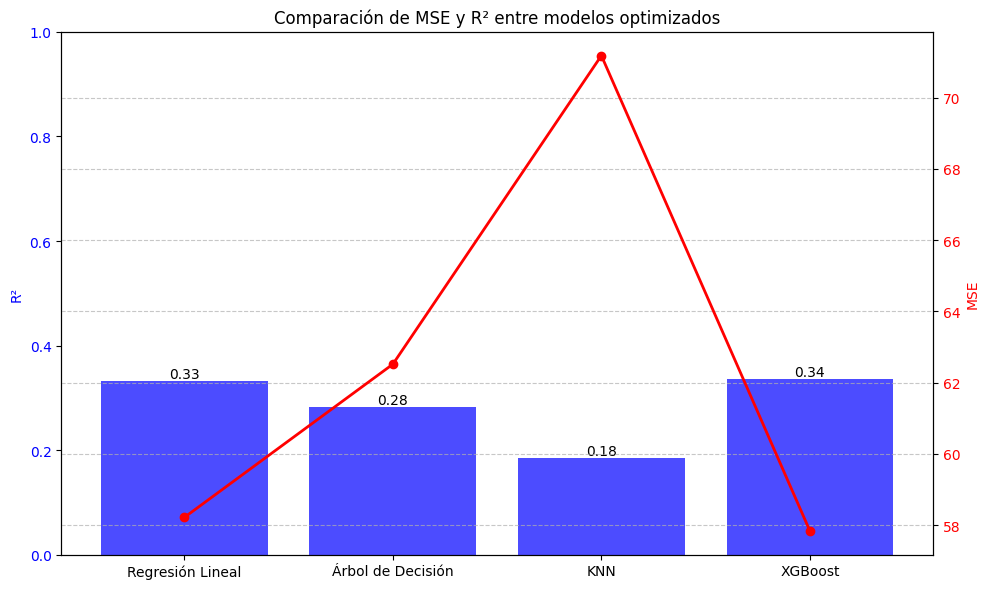

In [17]:
# Hiperparámetros para Regresión Lineal
param_grid_lr = {
    'fit_intercept': [True, False],  # Si se ajusta el intercepto o no
    'copy_X': [True, False]          # Si se copia X o se sobrescribe
}

# Hiperparámetros para Árbol de Decisión
param_grid_tree = {
    'max_depth': [3, 5, 10, 20],          # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],      # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 5]         # Mínimo de muestras por hoja
}

# Hiperparámetros para K-Nearest Neighbors (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],          # Número de vecinos
    'weights': ['uniform', 'distance'],     # Peso uniforme o basado en la distancia
    'metric': ['euclidean', 'manhattan']    # Distancia euclidiana o manhattan
}

# Hiperparámetros para XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],         # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2],      # Tasa de aprendizaje
    'max_depth': [3, 5, 7]                  # Profundidad máxima del árbol
}
# Aplicar GridSearchCV a cada modelo
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# Entrenar modelos optimizados
grid_search_lr.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

# Obtener los mejores modelos
best_lr = grid_search_lr.best_estimator_
best_tree = grid_search_tree.best_estimator_
best_knn = grid_search_knn.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

# Realizar predicciones en base a los mejores modelos obtenidos anteriormente
y_pred_lr_gs = best_lr.predict(X_test)
y_pred_tree_gs = best_tree.predict(X_test)
y_pred_knn_gs = best_knn.predict(X_test)
y_pred_xgb_gs = best_xgb.predict(X_test)

# Calcular R² de los modelos optimizados
r2_lr_gs = r2_score(y_test, y_pred_lr_gs)
r2_tree_gs = r2_score(y_test, y_pred_tree_gs)
r2_knn_gs = r2_score(y_test, y_pred_knn_gs)
r2_xgb_gs = r2_score(y_test, y_pred_xgb_gs)

mse_values = [
    mean_squared_error(y_test, y_pred_lr_gs),
    mean_squared_error(y_test, y_pred_tree_gs),
    mean_squared_error(y_test, y_pred_knn_gs),
    mean_squared_error(y_test, y_pred_xgb_gs)
]

print("Regresión Lineal con Hiper-parametros ajustados - MSE:", mse_values[0])
print("Regresión Lineal con Hiper-parametros ajustados - R²:", r2_lr_gs)
print("Árbol de Decisión con Hiper-parametros ajustados- MSE:", mse_values[1])
print("Árbol de Decisión con Hiper-parametros ajustados- R²:", r2_tree_gs)
print("K-Nearest Neighbors con Hiper-parametros ajustados - MSE:", mse_values[2])
print("K-Nearest Neighbors con Hiper-parametros ajustados - R²:", r2_knn_gs)
print("XGBoost con Hiper-parametros ajustados - MSE:", mse_values[3])
print("XGBoost con Hiper-parametros ajustados - R²:", r2_xgb_gs)

r2_values = [
    r2_score(y_test, y_pred_lr_gs),
    r2_score(y_test, y_pred_tree_gs),
    r2_score(y_test, y_pred_knn_gs),
    r2_score(y_test, y_pred_xgb_gs)
]

models = ['Regresión Lineal', 'Árbol de Decisión', 'KNN', 'XGBoost']

# Visualización de los resultados despues de optimizar los hiper-parametros
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(models, r2_values, color='blue', alpha=0.7, label='R²')
ax1.set_ylabel('R²', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 1)
for i, r2 in enumerate(r2_values):
    ax1.text(i, r2, f'{r2:.2f}', ha='center', va='bottom', fontsize=10, color='black')

ax2 = ax1.twinx()
ax2.plot(models, mse_values, color='red', marker='o', label='MSE', linewidth=2)
ax2.set_ylabel('MSE', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Comparación de MSE y R² entre modelos optimizados')
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 6.5. Modelos no optimizados vs optimizados

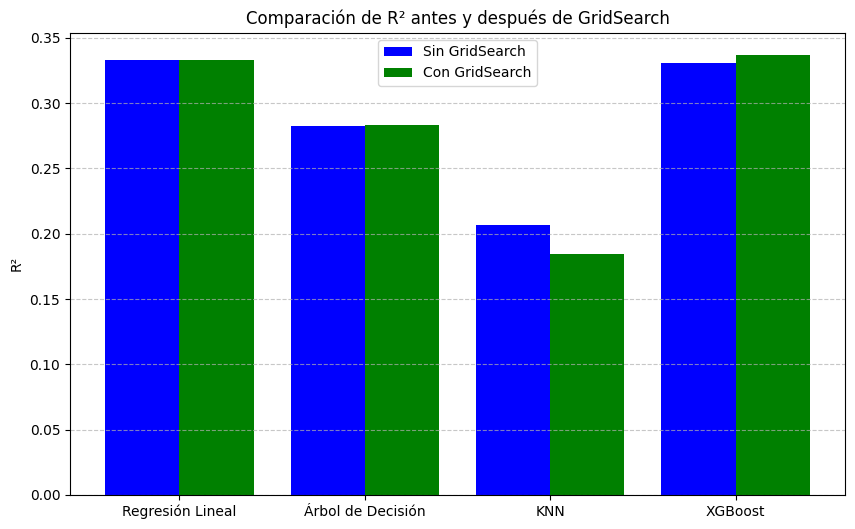

In [18]:
# Comparación de R² antes y después de la optimización
models = ['Regresión Lineal', 'Árbol de Decisión', 'KNN', 'XGBoost']
r2_before = [r2_lr, r2_tree, r2_knn, r2_xgb]
r2_after = [r2_lr_gs, r2_tree_gs, r2_knn_gs, r2_xgb_gs]

# Visualización de los resultados
x = range(len(models))
plt.figure(figsize=(10, 6))
plt.bar(x, r2_before, width=0.4, label='Sin GridSearch', color='blue', align='center')
plt.bar([p + 0.4 for p in x], r2_after, width=0.4, label='Con GridSearch', color='green', align='center')
plt.xticks([p + 0.2 for p in x], models)
plt.ylabel('R²')
plt.title('Comparación de R² antes y después de GridSearch')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 6.6. Feature Engineering

Mejores 10 características seleccionadas: Index(['Month', 'Hour', 'DayOfWeek', 'Temperature', 'Humidity',
       'SquareFootage', 'Occupancy', 'RenewableEnergy', 'Holiday_Yes',
       'HVACUsage_On'],
      dtype='object')


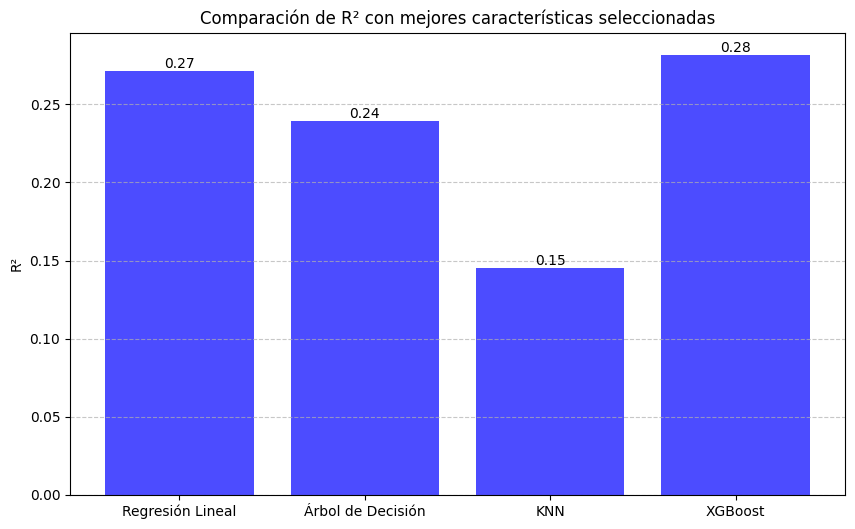

In [ ]:
#Seleccionar las mejores características
# Seleccionar las 10 mejores características usando SelectKBest
k = 10  # Número de características a seleccionar
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, Y)

# Nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print(f'Mejores {k} características seleccionadas:', selected_features)

# Crear nuevo DataFrame con las características seleccionadas
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# División del conjunto de datos con las características seleccionadas
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected_df, Y, test_size=0.20, random_state=42)

# Aplicar GridSearchCV a cada modelo con las características seleccionadas
grid_search_lr_sel = GridSearchCV(LinearRegression(), param_grid_lr, cv=5, scoring='r2')
grid_search_tree_sel = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='r2')
grid_search_knn_sel = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2')
grid_search_xgb_sel = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb, cv=5, scoring='r2')

# Entrenar modelos con GridSearch
grid_search_lr_sel.fit(X_train_sel, y_train_sel)
grid_search_tree_sel.fit(X_train_sel, y_train_sel)
grid_search_knn_sel.fit(X_train_sel, y_train_sel)
grid_search_xgb_sel.fit(X_train_sel, y_train_sel)

# Obtener los mejores modelos con características seleccionadas
best_lr_sel = grid_search_lr_sel.best_estimator_
best_tree_sel = grid_search_tree_sel.best_estimator_
best_knn_sel = grid_search_knn_sel.best_estimator_
best_xgb_sel = grid_search_xgb_sel.best_estimator_

# Realizar predicciones con los modelos optimizados
y_pred_lr_sel = best_lr_sel.predict(X_test_sel)
y_pred_tree_sel = best_tree_sel.predict(X_test_sel)
y_pred_knn_sel = best_knn_sel.predict(X_test_sel)
y_pred_xgb_sel = best_xgb_sel.predict(X_test_sel)

# Calcular R² de los modelos optimizados con características seleccionadas
r2_lr_sel = r2_score(y_test_sel, y_pred_lr_sel)
r2_tree_sel = r2_score(y_test_sel, y_pred_tree_sel)
r2_knn_sel = r2_score(y_test_sel, y_pred_knn_sel)
r2_xgb_sel = r2_score(y_test_sel, y_pred_xgb_sel)

# Comparación de R² con características seleccionadas
models = ['Regresión Lineal', 'Árbol de Decisión', 'KNN', 'XGBoost']
r2_values_selected = [r2_lr_sel, r2_tree_sel, r2_knn_sel, r2_xgb_sel]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values_selected, color='blue', alpha=0.7, label='R² con KBest')
plt.ylabel('R²')
plt.title('Comparación de R² con mejores características seleccionadas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores sobre las barras
for i, r2 in enumerate(r2_values_selected):
    plt.text(i, r2, f'{r2:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

---

## 7. Clustering

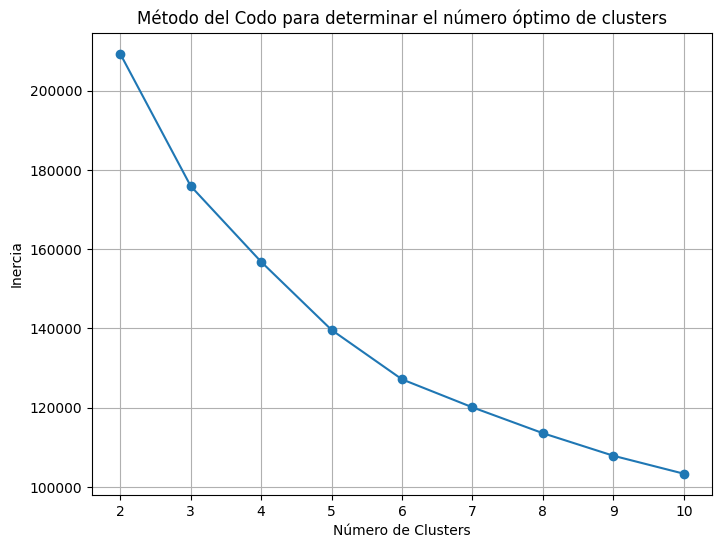

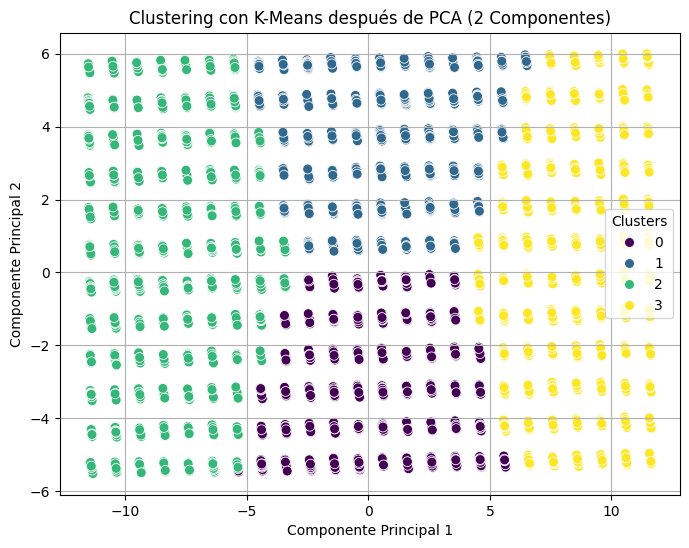

Número de Componentes: 2 - Coeficiente de Silhouette: 0.38


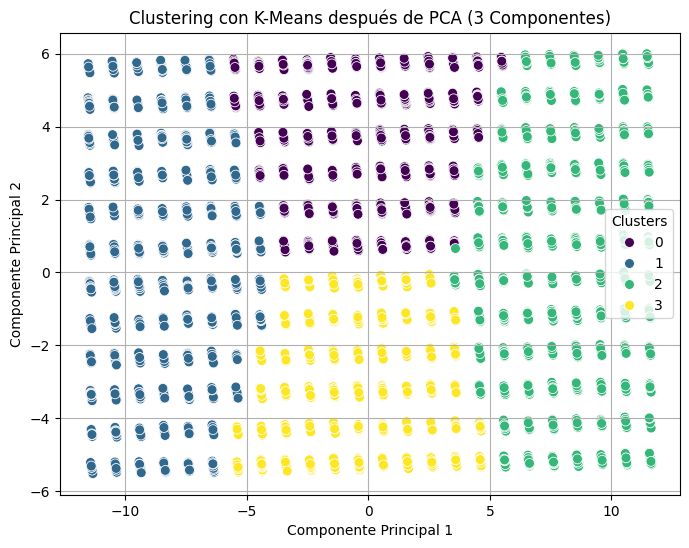

Número de Componentes: 3 - Coeficiente de Silhouette: 0.29


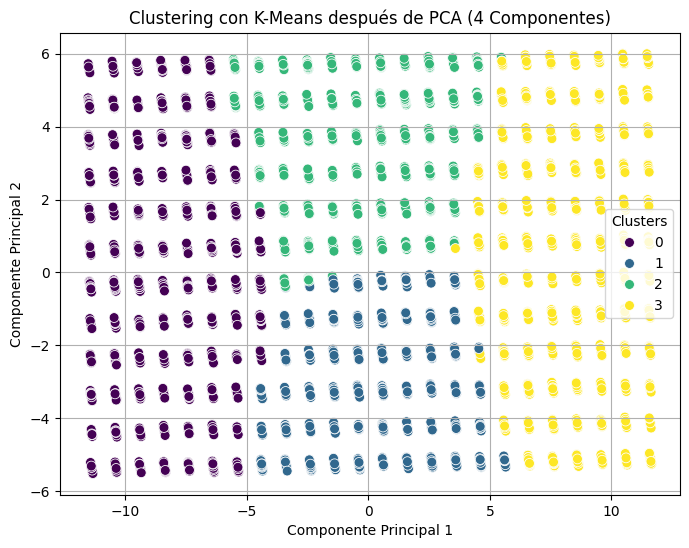

Número de Componentes: 4 - Coeficiente de Silhouette: 0.26


In [21]:
# Aplicar PCA para reducir a n componentes principales

# Evaluar la inercia para diferentes valores de k, gracias a esto podemos obtener el número de clusteres optimo
inertia = []
range_clusters = range(2, 11)  # Probar de 2 a 10 clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.grid()
plt.show()

# Iterar sobre diferentes números de componentes principales
for i in range(2, 5):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)

    # Aplicar K-Means después de la reducción de dimensionalidad
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_pca)

    # Visualizar los clusters resultantes (usando solo las dos primeras componentes para visualización)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=50)
    plt.title(f'Clustering con K-Means después de PCA ({i} Componentes)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.legend(title='Clusters')
    plt.show()

    # Calcular y mostrar el coeficiente de Silhouette
    sil_score = silhouette_score(X_pca, clusters)
    print(f'Número de Componentes: {i} - Coeficiente de Silhouette: {sil_score:.2f}')
